In [1]:
from google.colab import drive

drive.mount('/content/drive/')

%cd /content/drive/Shared drives/ECS289G Project/
# !ls

Mounted at /content/drive/
/content/drive/Shared drives/ECS289G Project


In [ ]:
from scipy.io import loadmat
M = loadmat('wiki_crop/wiki.mat')
dob, photo_taken, file_path, gender = M['wiki'][0][0][0], M['wiki'][0][0][1], M['wiki'][0][0][2], M['wiki'][0][0][3]


In [ ]:
# making birth year array

import numpy as np
dob = dob[0]
# print(dob)
# birth_year = np.zeros(dob.shape, dtype=np.int32)
# for i in range(len(dob)):
#   j = dob[i]%100
#   if j < 22:
#     j += 2000
#     birth_year[i] = j
#   else:
#     j+= 1900
#     birth_year[i] = j

# birth_year

In [ ]:
import datetime
import pandas as pd

# birth_year = pd.to_datetime(dob - 719529, unit='')
birth_year = []

for i in dob:
  date = datetime.datetime.fromordinal(int(i) - 366)
  birth_year.append(date.year)

birth_year = np.array(birth_year)

In [ ]:
photo_taken = photo_taken[0]

In [ ]:
photo_taken.shape

(62328,)

In [ ]:
age = photo_taken - birth_year
age

array([28, 39, 60, ..., 41, 30, 54])

In [ ]:
processed_age = []
for i in age:
  if i<=3:
    processed_age.append('0-2')
  elif i <= 7:
    processed_age.append('4-6')
  elif i <= 13:
    processed_age.append('8-13')
  elif i <= 22:
    processed_age.append('15-20')
  elif i <= 34:
    processed_age.append('25-32')
  elif i <= 45:
    processed_age.append('38-43')
  elif i <= 59:
    processed_age.append('48-53')
  else:
    processed_age.append('60+')

len(processed_age)

62328

In [ ]:
gender = gender[0]

In [ ]:
processed_gender = []
for i in gender:
  if i == 1:
    processed_gender.append('m')
  elif i == 0:
    processed_gender.append('f')
  else:
    processed_gender.append('u')

<function matplotlib.pyplot.show(*args, **kw)>

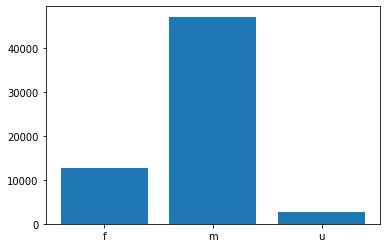

In [ ]:
import matplotlib.pyplot as plt

gender = ['f', 'm', 'u']
plt.bar(gender, [processed_gender.count('f'), processed_gender.count('m'), processed_gender.count('u')])
plt.show

In [ ]:
file_path = file_path[0]

In [ ]:
processed_filepath = []
for i in file_path:
  processed_filepath.append(i[0])
len(processed_filepath)

62328

In [ ]:
processed_data = list(zip(processed_filepath, processed_age, processed_gender))
len(processed_data)

62328

In [ ]:
objects_to_remove = []
for i in processed_data:
  if i[2] == 'u':
    objects_to_remove.append(i)
for i in objects_to_remove:
  processed_data.remove(i)

len(processed_data)

59685

In [ ]:
output_file = open("wiki_processed_data.txt", 'w')
for i in processed_data:
  output_file.write(str(i)+'\n')
output_file.close()

In [ ]:
face_location = M['wiki'][0][0][5]
face_location = face_location[0]

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
# for data, fl_coordinates in zip(processed_data, face_location):
#   image = Image.open('wiki_crop/'+data[0])
#   image_array = np.array(image)
#   plt.imshow(image_array)

#   cropped_image_array = image_array[int(fl_coordinates[0][1]):int(fl_coordinates[0][3]), int(fl_coordinates[0][0]): int(fl_coordinates[0][2]), :]
#   # print(cropped_image_array.s)
#   # plt.imshow(cropped_image_array)
#   break

In [ ]:
images = []
for i in processed_filepath:
  image = Image.open('wiki_crop/'+data[0])
  image.resize((227,227))

17/10000217_1981-05-05_2009.jpg
